In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle


df = pd.read_csv('fulldata.csv')

df = shuffle(df, random_state=42)

X = df['text']  
y = df['fake_news_flag']  # Labels (0: real, 1: fake)
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = LogisticRegression() 
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)



/Users/jasperhoong/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(y_test, y_pred)
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Testing new predictions
new_text = ["Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."]
new_text_tfidf = vectorizer.transform(new_text)
prediction = model.predict(new_text_tfidf)

# Output prediction (0 for real, 1 for fake)
print(f"Prediction (0: real, 1: fake): {prediction[0]}")


18526    1
91199    1
66590    0
76324    1
20939    0
        ..
46488    1
29647    0
56028    0
94243    1
36450    0
Name: fake_news_flag, Length: 23287, dtype: int64 [0 1 0 ... 0 0 0]
Accuracy: 0.643663846781466
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65     11466
           1       0.66      0.62      0.64     11821

    accuracy                           0.64     23287
   macro avg       0.64      0.64      0.64     23287
weighted avg       0.64      0.64      0.64     23287

Prediction (0: real, 1: fake): 0


/Users/jasperhoong/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jasperhoong/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

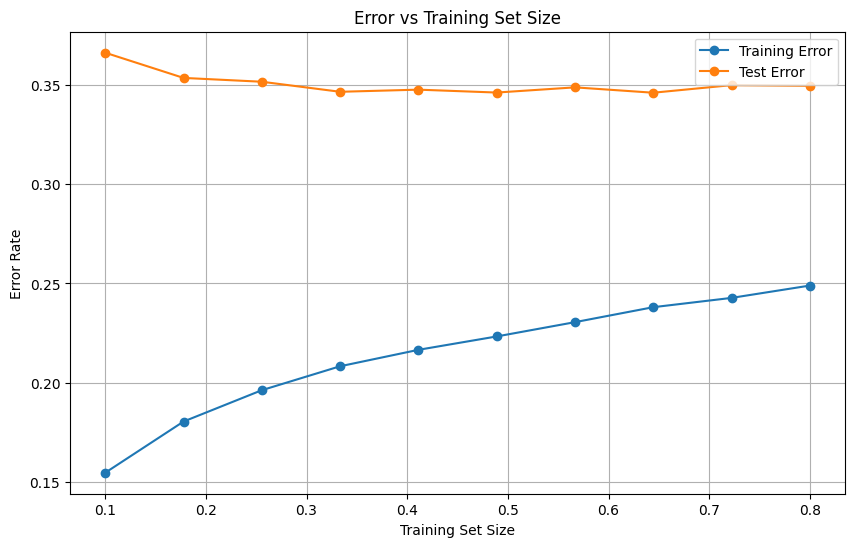

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


training_set_sizes = np.linspace(0.1, 0.8, 10) 
train_errors = []
test_errors = []

# Loop through different training set sizes
for train_size in training_set_sizes:
    # Get subset of training set
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)

    model = LogisticRegression()
    model.fit(X_train_subset, y_train_subset)
    
    train_pred = model.predict(X_train_subset)
    test_pred = model.predict(X_test)
    
    # Compute accuracy scores for testing and training
    train_error = 1 - accuracy_score(y_train_subset, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    # Add new scores to list
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, train_errors, label="Training Error", marker='o')
plt.plot(training_set_sizes, test_errors, label="Test Error", marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")
plt.title("Error vs Training Set Size")
plt.legend()
plt.grid(True)
plt.show()